## Python Analysis of Choizy's Global performance.

What is shown in this file is just a part of the analysis performed in python. More graphs were made with R and PowerBI, but the deep analysis and conclusions can be found in the PDF attached as $\textit{Final Project}$.

In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_excel("C:/Users/marti/Downloads/Contenido 2023-10-10_2024-02-19 Choizy.xlsx")

df = df.dropna(subset=['Visualizaciones'])
df = df[df['Contenido'] != 'Total']

X = df[['Me gusta', 'Suscriptores ganados']]
X = sm.add_constant(X)  
y = df['Visualizaciones']

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

numero_de_condicion = np.linalg.cond(modelo.model.exog)
print('Número de condición:', numero_de_condicion)


                            OLS Regression Results                            
Dep. Variable:        Visualizaciones   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1394.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           1.03e-37
Time:                        21:18:57   Log-Likelihood:                -591.04
No. Observations:                  43   AIC:                             1188.
Df Residuals:                      40   BIC:                             1193.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.638e+04 

Correlación entre Vistos (frente a saltados) (%) y Visualizaciones: 0.47152731269757353
Correlación entre Porcentaje medio visto (%) y Visualizaciones: 0.40053513826593884


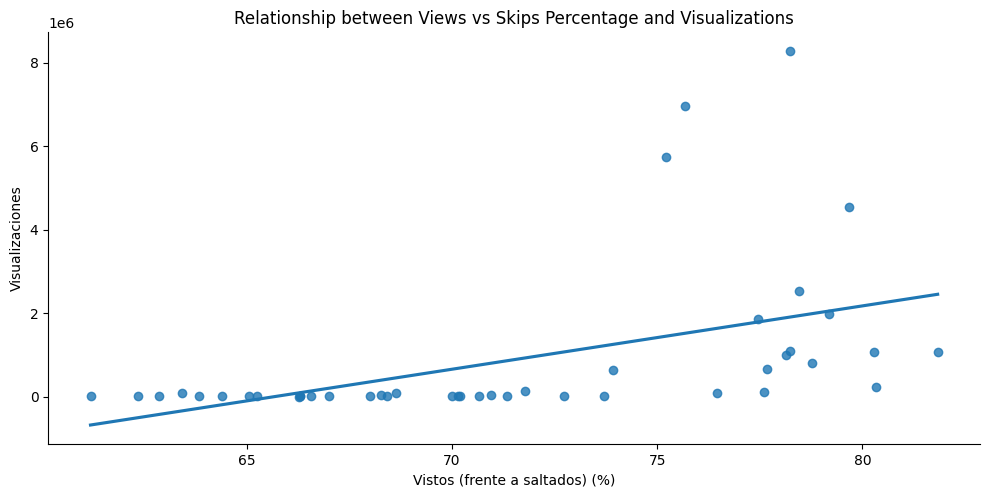

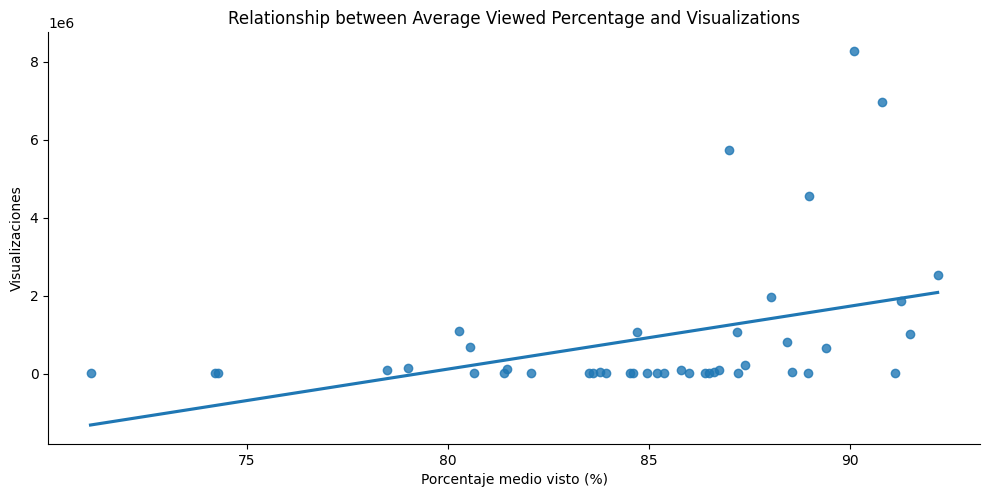

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

correlacion_vistos = df['Vistos (frente a saltados) (%)'].corr(df['Visualizaciones'])
correlacion_porcentaje_visto = df['Porcentaje medio visto (%)'].corr(df['Visualizaciones'])

print(f"Correlación entre Vistos (frente a saltados) (%) y Visualizaciones: {correlacion_vistos}")
print(f"Correlación entre Porcentaje medio visto (%) y Visualizaciones: {correlacion_porcentaje_visto}")

sns.lmplot(x='Vistos (frente a saltados) (%)', y='Visualizaciones', data=df, aspect=2, ci=None)
plt.title("Relationship between Views vs Skips Percentage and Visualizations")

sns.lmplot(x='Porcentaje medio visto (%)', y='Visualizaciones', data=df, aspect=2, ci=None)
plt.title("Relationship between Average Viewed Percentage and Visualizations")
plt.show()


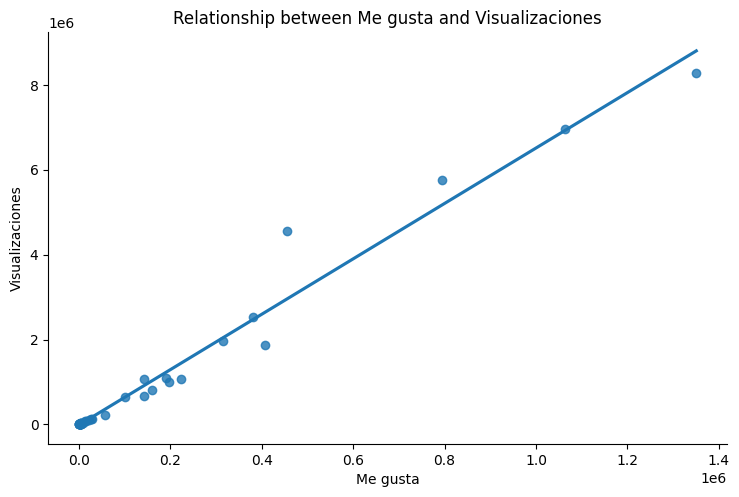

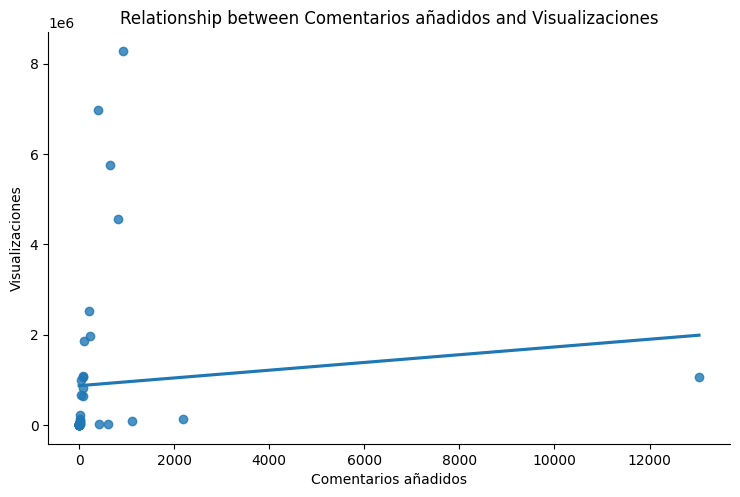

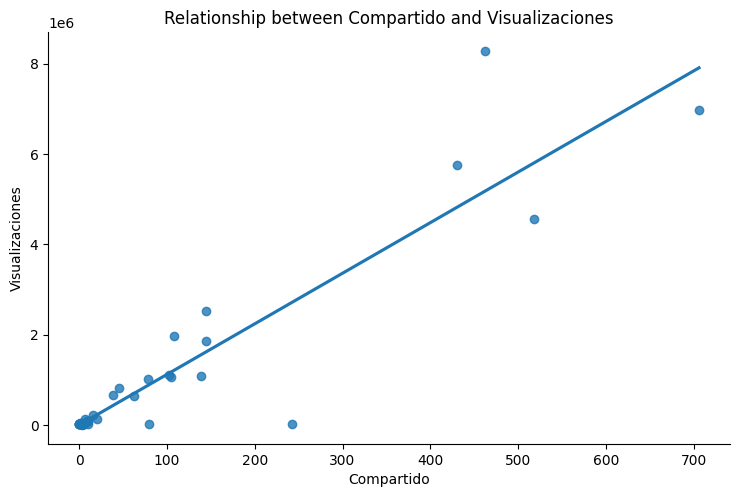

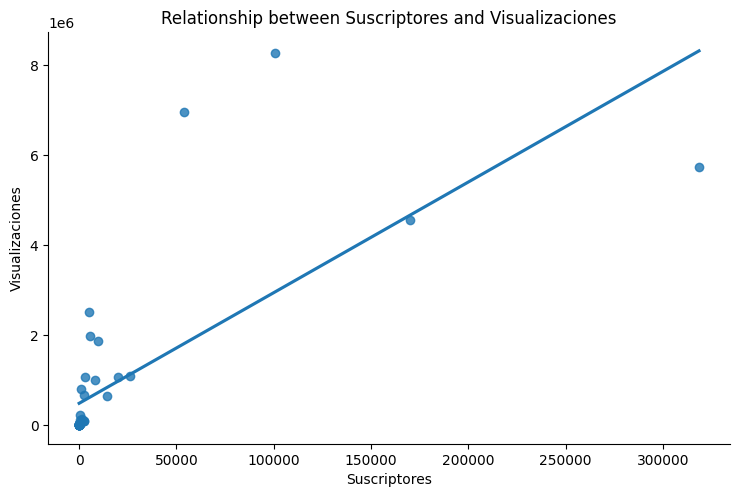

In [5]:
def create_regression_plot(data, predictor, y='Visualizaciones'):
    sns.lmplot(x=predictor, y=y, data=data, aspect=1.5, ci=None)
    plt.title(f"Relationship between {predictor} and {y}")

create_regression_plot(df, 'Me gusta')
create_regression_plot(df, 'Comentarios añadidos')
create_regression_plot(df, 'Compartido')
create_regression_plot(df, 'Suscriptores')


C:\Users\marti\AppData\Local\Temp\ipykernel_17900\3651832866.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vis_promedio_porcentaje_visto = df.groupby('Categoria_Porcentaje_Visto')['Visualizaciones'].mean().reset_index()
C:\Users\marti\AppData\Local\Temp\ipykernel_17900\3651832866.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vis_promedio_vistos_vs_saltados = df.groupby('Categoria_Vistos_vs_Saltados')['Visualizaciones'].mean().reset_index()
C:\Users\marti\AppData\Local\Temp\ipykernel_17900\3651832866.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

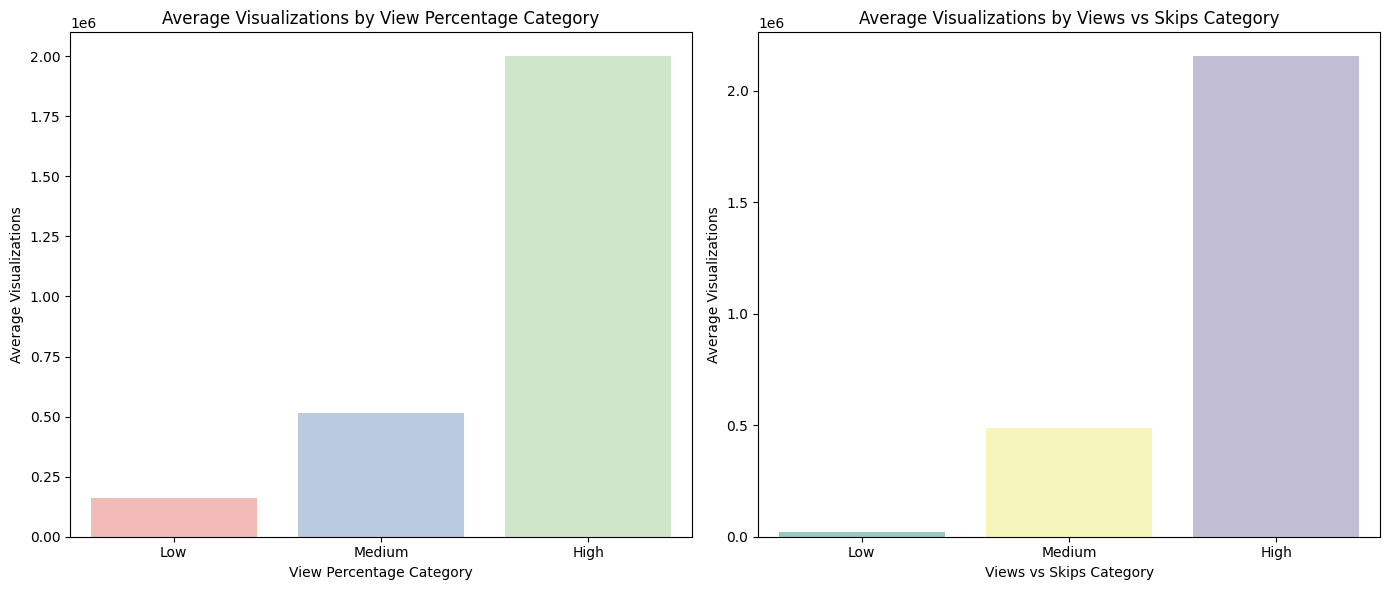

  Categoria_Porcentaje_Visto  Visualizaciones
0                        Low     1.604519e+05
1                     Medium     5.132278e+05
2                       High     1.999208e+06
  Categoria_Vistos_vs_Saltados  Visualizaciones
0                          Low     1.969629e+04
1                       Medium     4.871809e+05
2                         High     2.154891e+06


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = df.dropna(subset=['Visualizaciones'])
df = df[df['Contenido'] != 'Total']

df['Categoria_Porcentaje_Visto'] = pd.cut(df['Porcentaje medio visto (%)'], 
                                          bins=np.percentile(df['Porcentaje medio visto (%)'], [0, 33, 66, 100]), 
                                          include_lowest=True, 
                                          labels=["Low", "Medium", "High"])

df['Categoria_Vistos_vs_Saltados'] = pd.cut(df['Vistos (frente a saltados) (%)'], 
                                            bins=np.percentile(df['Vistos (frente a saltados) (%)'], [0, 33, 66, 100]), 
                                            include_lowest=True, 
                                            labels=["Low", "Medium", "High"])

vis_promedio_porcentaje_visto = df.groupby('Categoria_Porcentaje_Visto')['Visualizaciones'].mean().reset_index()
vis_promedio_vistos_vs_saltados = df.groupby('Categoria_Vistos_vs_Saltados')['Visualizaciones'].mean().reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Categoria_Porcentaje_Visto', y='Visualizaciones', data=vis_promedio_porcentaje_visto, palette='Pastel1')
plt.title('Average Visualizations by View Percentage Category')
plt.xlabel('View Percentage Category')
plt.ylabel('Average Visualizations')

plt.subplot(1, 2, 2)
sns.barplot(x='Categoria_Vistos_vs_Saltados', y='Visualizaciones', data=vis_promedio_vistos_vs_saltados, palette='Set3')
plt.title('Average Visualizations by Views vs Skips Category')
plt.xlabel('Views vs Skips Category')
plt.ylabel('Average Visualizations')

plt.tight_layout()
plt.show()

print(vis_promedio_porcentaje_visto)
print(vis_promedio_vistos_vs_saltados)
